In [16]:
import matplotlib.pyplot as plt
import augmentations
from torchvision.transforms import v2
from torchvision.datasets import CIFAR10
import pytorch_lightning as pl
import torch
import numpy as np
pl.seed_everything(42)

Seed set to 42


42

In [14]:
def get_data(augmentation):
    train_transform = v2.Compose(
        [
            augmentations.AddParams(),
            augmentation,
            augmentations.ToTensor()
        ]
    )

    dataset = CIFAR10(
        root="./", download=True, train=True, transform=train_transform
    )
    dataset = torch.utils.data.Subset(dataset, [0] * 10)

    loader = torch.utils.data.DataLoader(
                dataset,
                batch_size=10
            )
    return loader

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


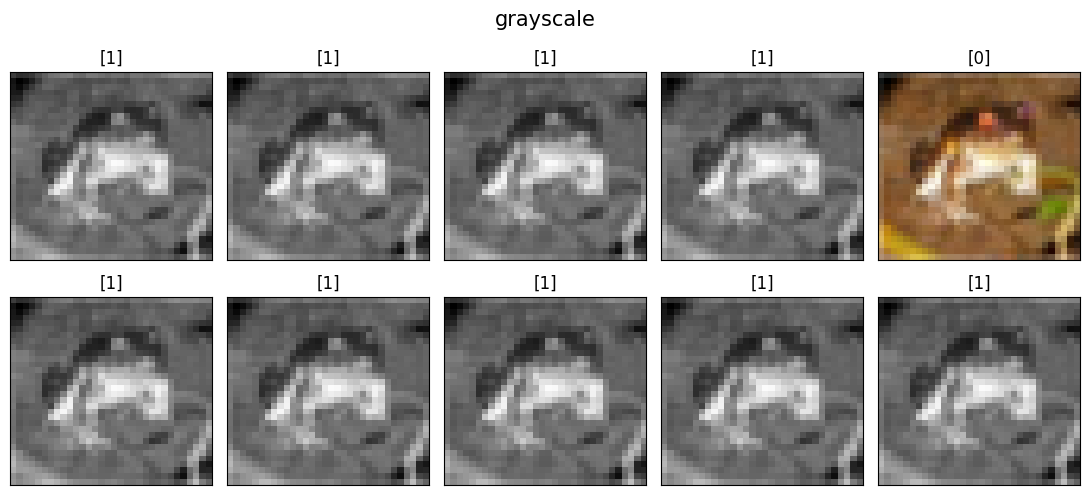

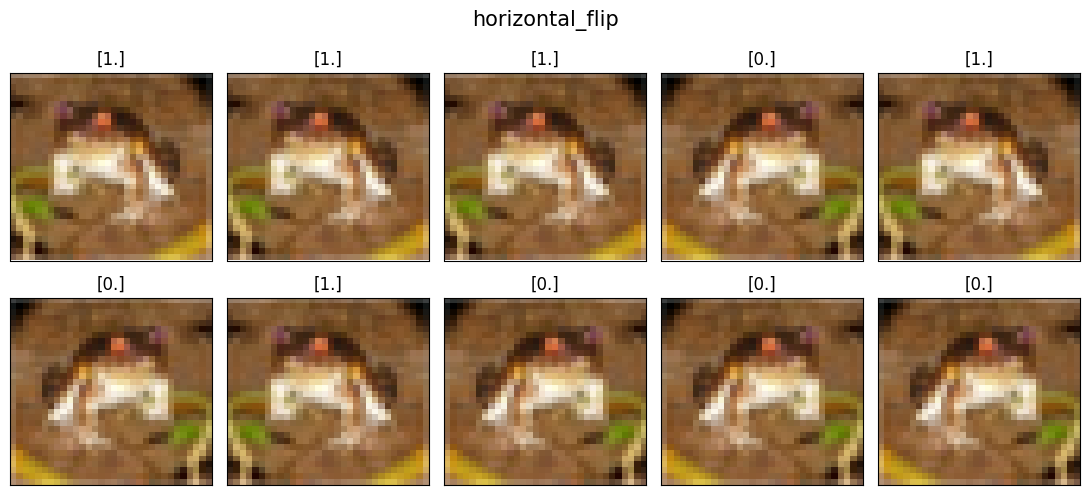

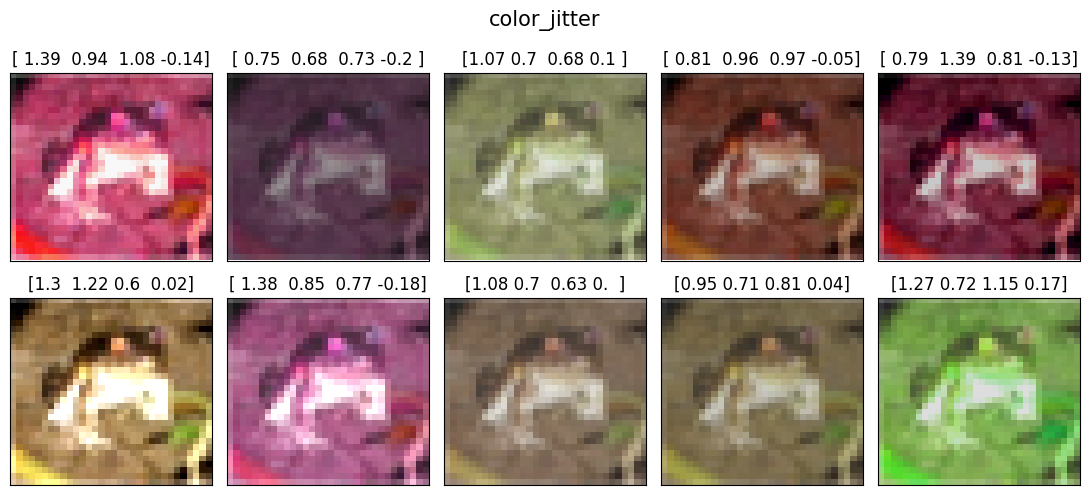

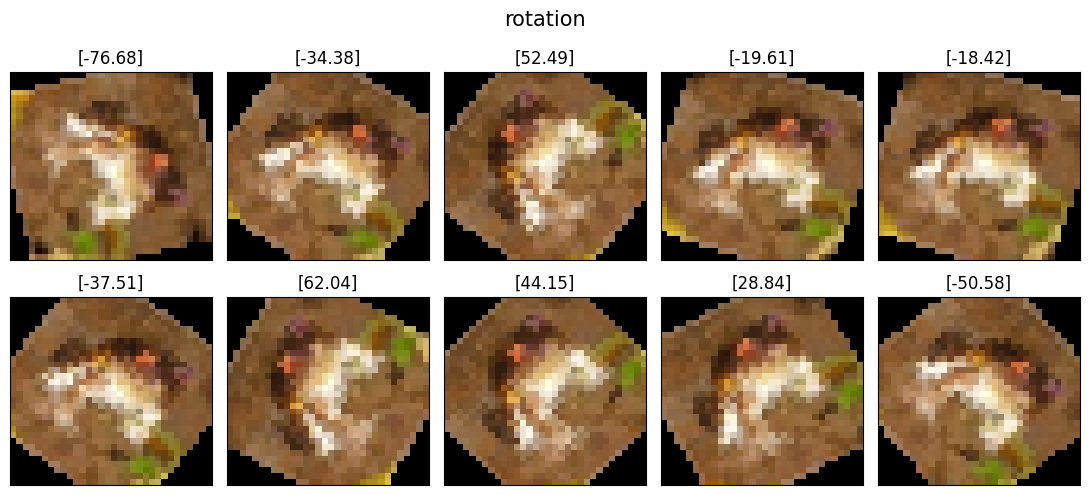

NameError: name 'asdf' is not defined

In [20]:
for name, augmentation in zip(["grayscale", "horizontal_flip", "color_jitter", "rotation"],[augmentations.RandomGrayscale(0.5), augmentations.RandomHorizontalFlip(0.5), augmentations.ColorJitter(0.4,0.4,0.4,0.2), augmentations.RandomRotation(90)]):
    loader = get_data(augmentation)
    fig, axs = plt.subplots(2,5, figsize=(11,5))
    for images, labels in loader:
        for i in range(2):
            for j in range(5):
                im = images[0][i*5+j].permute(1,2,0)
                axs[i,j].imshow(im,aspect="auto")
                axs[i,j].set_xticks([])
                axs[i,j].set_yticks([])
                axs[i,j].set_title(np.round(images[1][i*5+j].numpy(),2))
    fig.suptitle(name, fontsize=15)
    plt.tight_layout()
plt.show()